In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df=pd.read_csv("../../DATA/fake_reg.csv")

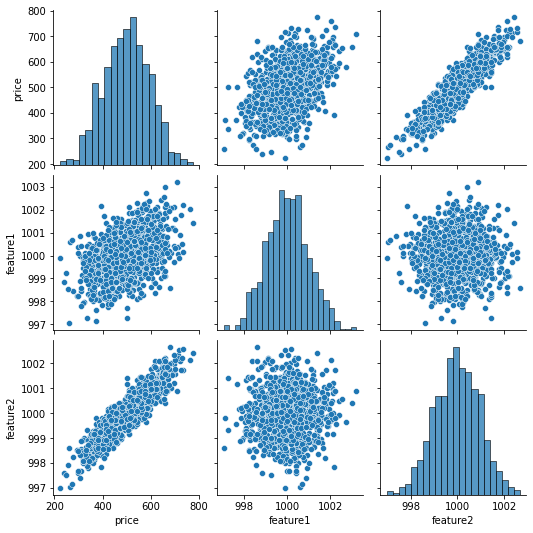

In [4]:
sns.pairplot(data=df)

In [5]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [6]:
X=df[['feature1','feature2']].values

In [7]:
y=df['price'].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
# scaler.fit(X_test)

In [10]:
# datax=X_train[:,1:]
# y=y_train

# plot=pd.DataFrame()
# plot['x']=datax.reshape(1,700)[0]
# plot['y']=y
# sns.pairplot(data=plot)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
# help(Dense)

In [13]:
# model=Sequential([Dense(4,activation="relu"),
#                   Dense(4,activation="relu"),
#                   Dense(1)])

In [14]:
model=Sequential()
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))


model.add(Dense(1))
model.compile(optimizer="rmsprop"
              ,loss="mse"
              )

In [15]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 256290.2656
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 255903.9062
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 255474.7656
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 254982.7031
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 254431.1094
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 253809.9375
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 253104.4531
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 252313.3906
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 251438.0312
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 250466.9219
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 249378.4844
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

22/22 [==============================] - 0s 911us/step - loss: 24.0564
Epoch 195/250
22/22 [==============================] - 0s 895us/step - loss: 24.5281
Epoch 196/250
22/22 [==============================] - 0s 833us/step - loss: 24.8424
Epoch 197/250
22/22 [==============================] - 0s 903us/step - loss: 24.2053
Epoch 198/250
22/22 [==============================] - 0s 950us/step - loss: 24.7651
Epoch 199/250
22/22 [==============================] - 0s 859us/step - loss: 24.4101
Epoch 200/250
22/22 [==============================] - 0s 816us/step - loss: 23.9696
Epoch 201/250
22/22 [==============================] - 0s 872us/step - loss: 25.0974
Epoch 202/250
22/22 [==============================] - 0s 856us/step - loss: 24.2880
Epoch 203/250
22/22 [==============================] - 0s 799us/step - loss: 24.5718
Epoch 204/250
22/22 [==============================] - 0s 829us/step - loss: 24.8533
Epoch 205/250
22/22 [==============================] - 0s 854us/step - loss: 24

<AxesSubplot:>

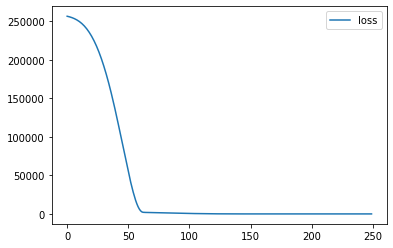

In [16]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()


In [17]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [19]:
model.evaluate(X_test,y_test,verbose=0)

25.749013900756836

In [77]:
model.evaluate(X_train,y_train,verbose=0)

23.934377670288086

In [94]:
test_predictions=model.predict(X_test)

In [95]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [96]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [97]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [98]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [99]:
pred_df.columns = ['Test Y','Model Predictions']

In [100]:
pred_df


,Test Y,Model Predictions
0,402.296319,405.902130
1,624.156198,624.513428
2,582.455066,593.056519
3,578.588606,573.108337
4,371.224104,367.152069
...,...,...
295,525.704657,529.856567
296,502.909473,516.105103
297,612.727910,610.603943
298,417.569725,417.592834


<AxesSubplot:xlabel='Test Y', ylabel='Model Predictions'>

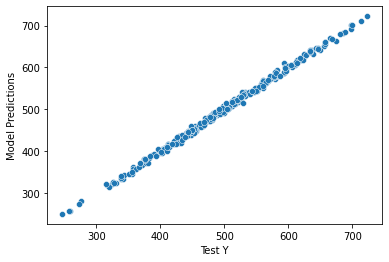

In [102]:
sns.scatterplot(x="Test Y",y="Model Predictions",data=pred_df)

In [103]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

In [104]:
pred_df

,Test Y,Model Predictions,Error
0,402.296319,405.902130,-3.605811
1,624.156198,624.513428,-0.357229
2,582.455066,593.056519,-10.601452
3,578.588606,573.108337,5.480269
4,371.224104,367.152069,4.072035
...,...,...,...
295,525.704657,529.856567,-4.151911
296,502.909473,516.105103,-13.195629
297,612.727910,610.603943,2.123967
298,417.569725,417.592834,-0.023110


In [107]:
from sklearn.metrics import mean_squared_error

In [113]:
rms=mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])**0.5

In [114]:
rms

5.074348970907608

In [115]:
from tensorflow.keras.models import load_model

In [116]:
model.save("kerasfeaturemodel.h5")


In [118]:
new=load_model("kerasfeaturemodel.h5")

In [122]:
#new trial
new_gem=[[998,1000]]
new_gem=scaler.transform(new_gem)

In [123]:
model.predict(new_gem)

array([[420.31094]], dtype=float32)

In [124]:
new_gem

array([[0.14117652, 0.53968792]])

array([3, 4, 5, 6])